## Vectorizing raw data -  Count Vectorization

In [4]:
import nltk
import pandas as pd
import re
import string
PS = nltk.PorterStemmer()
pd.set_option('display.max_colwidth',100)
stopwords = nltk.corpus.stopwords.words('english')
data = pd.read_csv("SMSSpamCollection.tsv", sep ='\t')
data.columns = ['label', 'body_text']
data

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...
...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5563,ham,Will ü b going to esplanade fr home?
5564,ham,"Pity, * was in mood for that. So...any other suggestions?"
5565,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


In [6]:
def clean_text(line):
    text = "".join([word.lower() for word in line if word not in string.punctuation])
    tokens = re.split("\W+", text)
    stopword_ = [PS.stem(w) for w in tokens if w not in stopwords]
    return stopword_
    

### CountVectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(analyzer = clean_text)
x_counts = count_vector.fit_transform(data["body_text"])
print(x_counts.shape)
#print(count_vector.get_feature_names())

(5567, 8104)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

#### Sparse metrices

In [34]:
data_sample = data[0:20]
count_vector_sample = CountVectorizer(analyzer = clean_text)
x_counts_sample = count_vector_sample.fit_transform(data_sample["body_text"])
print(x_counts_sample.shape)
print(count_vector_sample.get_feature_names())

(20, 192)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'na

In [17]:
x_counts_df  = pd.DataFrame(x_counts_sample.toarray())
x_counts_df.columns = count_vector_sample.get_feature_names()
x_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


## N-Grams

In [19]:
def clean_text_(line):
    text = "".join([word.lower() for word in line if word not in string.punctuation])
    tokens = re.split("\W+", text)
    stopword_ = " ".join([PS.stem(w) for w in tokens if w not in stopwords])
    return stopword_
data["clean_text"] = data["body_text"].apply(lambda x: clean_text_(x))   
data

,label,body_text,clean_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...
...,...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,2nd time tri 2 contact u u 750 pound prize 2 claim easi call 087187272008 now1 10p per minut btn...
5563,ham,Will ü b going to esplanade fr home?,ü b go esplanad fr home
5564,ham,"Pity, * was in mood for that. So...any other suggestions?",piti mood soani suggest
5565,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,guy bitch act like id interest buy someth els next week gave us free


In [33]:
ngram_vect = CountVectorizer(ngram_range =(2,2)) #1,1 - unigrams, 1-2 unigrams and bigrams ...
x_ngram_counts = ngram_vect.fit_transform(data["clean_text"])
print(x_ngram_counts.shape)
#print(ngram_vect.get_feature_names())

(5567, 31260)


In [24]:
#smaller sample
data_s = data[0:20]
ngram_vect_sample = CountVectorizer(ngram_range =(2,2)) #1,1 - unigrams, 1-2 unigrams and bigrams ...
x_ngram_counts_sample = ngram_vect_sample.fit_transform(data_s["clean_text"])
print(x_ngram_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 198)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'alright way', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', 'fa 87121', 'fa cup

In [26]:
x_ngram_counts_df = pd.DataFrame(x_ngram_counts_sample.toarray())
x_ngram_counts_df.columns = ngram_vect_sample.get_feature_names()
x_ngram_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,way meet,week free,win cash,win fa,winner valu,wkli comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


# Term frequency - Inverse documentation frequency ( TF- IDF )

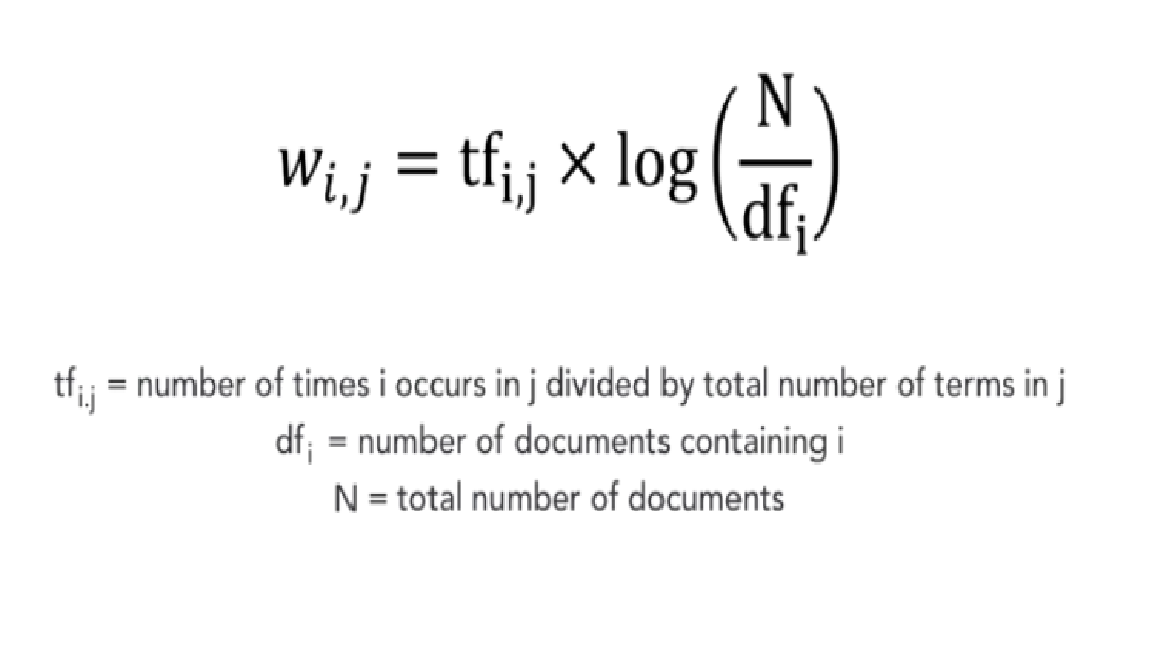

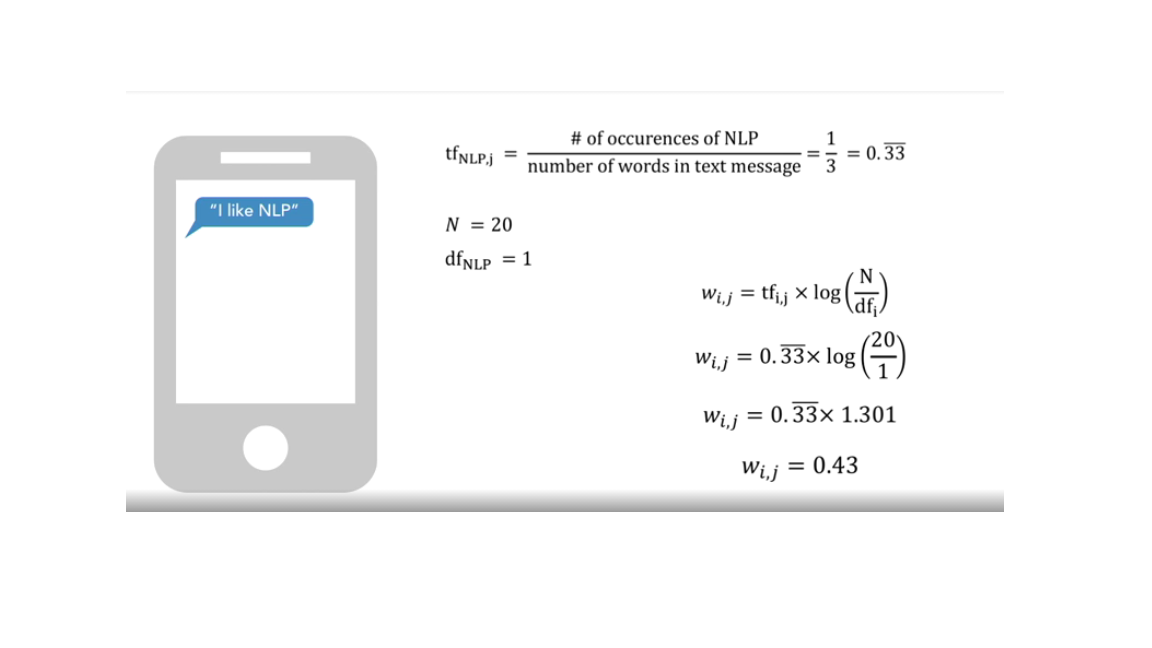

In [27]:
def clean_text__(line):
    text = "".join([word.lower() for word in line if word not in string.punctuation])
    tokens = re.split("\W+", text)
    stopword_ = [PS.stem(w) for w in tokens if w not in stopwords]
    return stopword_
    

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vect = TfidfVectorizer(analyzer = clean_text__)
X_TFIDF_counts = TFIDF_vect.fit_transform(data["body_text"])
print(X_TFIDF_counts.shape)
#print(TFIDF_vect.get_feature_names())

(5567, 8104)


In [31]:
#sample data
TFIDF_vect_sample = TfidfVectorizer(analyzer = clean_text__)
X_TFIDF_counts_sample = TFIDF_vect_sample.fit_transform(data_sample["body_text"])
print(X_TFIDF_counts_sample.shape)
print(TFIDF_vect_sample.get_feature_names())

(20, 192)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'na

In [32]:
X_TFIDF_counts_df = pd.DataFrame(X_TFIDF_counts_sample.toarray())
X_TFIDF_counts_df.columns = TFIDF_vect_sample.get_feature_names()
X_TFIDF_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.197695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.252972,0.000000,0.252972,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252972,0.252972,0.000000,0.000000,0.000000,0.000000
